# Example run of 1D CNN for Human Activity Recognition
Using default parameters

In [1]:
import sys
sys.path.append('../')
import os 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from HAR.ml.CNN1d import training, run_experiment
from HAR.data_utils.pkl import load_obj

In [2]:
def plot_loss_acc(exp_dirs, outpath=None):
    """Plots loss and accuracy for all experiments in exp_dirs"""
    fig, axes = plt.subplots(len(exp_dirs), 2, figsize=(15,30))
    axes[0,0].set_title('Loss', size=30)
    axes[0,1].set_title('Accuracy (%)', size=30)
    for i, d in enumerate(exp_dirs):
        metrics = load_obj(os.path.join(d,'metrics_dict.pkl'))
        axes[i,0].plot(np.arange(len(metrics['train_loss'])),metrics['train_loss'], 'r', label='train')
        axes[i,0].plot(np.arange(len(metrics['train_loss'])),metrics['test_loss'], 'b', label='test')
        axes[i,1].plot(np.arange(len(metrics['train_loss'])),metrics['train_acc'], 'r', label='train')
        axes[i,1].plot(np.arange(len(metrics['train_loss'])),metrics['test_acc'], 'b', label='test')
    axes[0,0].legend()
    axes[0,1].legend()
    if outpath: fig.savefig(outpath)
    return fig

In [3]:
avg_metrics = run_experiment('../tmp', repeats=5, verbose=False, n_epochs=10)

Training for experiment 1
Finised training in 1.149 minutes
Test accuracy : 90.40%
Training for experiment 2
Finised training in 1.140 minutes
Test accuracy : 90.80%
Training for experiment 3
Finised training in 1.134 minutes
Test accuracy : 89.31%
Training for experiment 4
Finised training in 1.125 minutes
Test accuracy : 90.80%
Training for experiment 5
Finised training in 1.150 minutes
Test accuracy : 90.87%
Finised training 5 models in 5.739 minutes
Average metrics over 5 runs
train_loss:    0.003
test_loss:    0.017
train_acc:   96.045
test_acc:   90.438


['../tmp/exp_2', '../tmp/exp_5', '../tmp/exp_4', '../tmp/exp_3', '../tmp/exp_1']


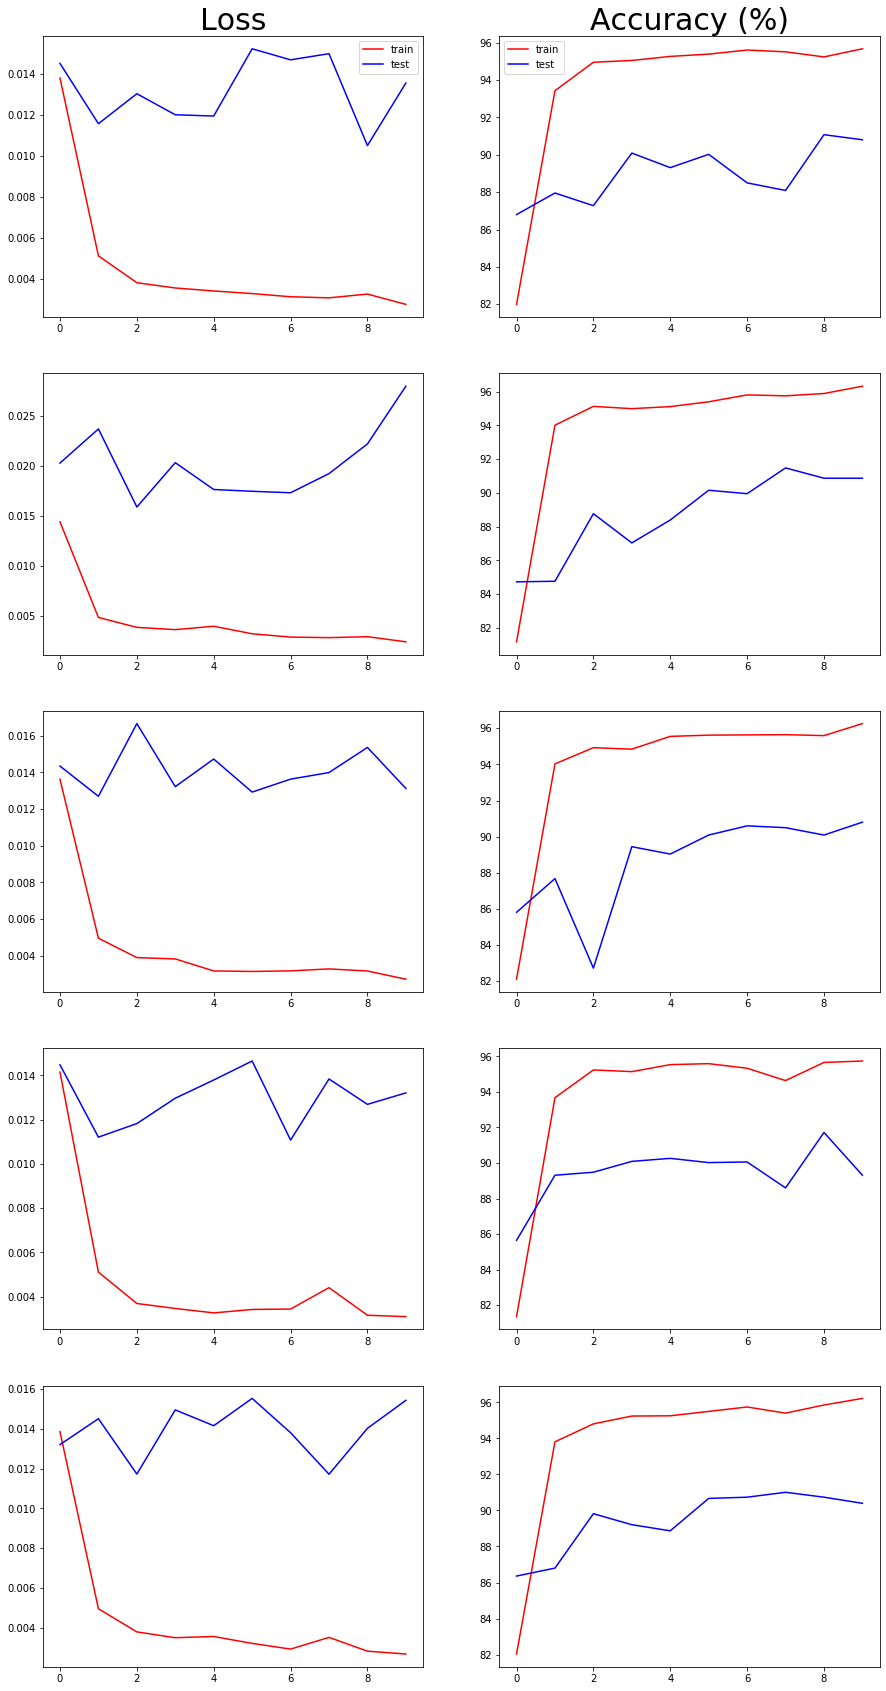

In [13]:
exp_dirs = [os.path.join('../tmp',d) for d in os.listdir('../tmp') if d[:3]=='exp' and os.path.isdir(os.path.join('../tmp',d))]
print(exp_dirs)
fig = plot_loss_acc(exp_dirs)